In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib, collections, itertools, os, re, textwrap, logging
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from functools import reduce

from logging.config import dictConfig
from logging import getLogger

import yt_misc_py as yt_misc


import rivas_decomposition_py as decomposition


dictConfig(dict(
    version = 1,
    formatters = {
        'f': {'format':
              '%(asctime)s %(name)-12s %(levelname)-8s %(message)s'}
        },
    handlers = {
        'h': {'class': 'logging.StreamHandler',
              'formatter': 'f',
              'level': logging.DEBUG}
        },
    root = {
        'handlers': ['h'],
        'level': logging.DEBUG,
        },
))


font = {
#     'family' : 'normal',
#     'weight' : 'bold',
    'size'   : 16
}

matplotlib.rc('font', **font)
logger = getLogger('notebook')


In [4]:
repo_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath(os.getcwd()))))

out_dir = os.path.join(
    repo_dir, 'figs', os.path.basename(os.path.realpath(os.getcwd())),
)


In [5]:
d_PTVs = decomposition.decomposition(os.path.join(
    repo_dir, 'private_data', 'npz', 'dev_PTVsNonMHC_z_center_p0001_100PCs_20180129.npz'
))

d_coding = decomposition.decomposition(os.path.join(
    repo_dir, 'private_data', 'npz', 'dev_codingNonMHC_z_center_p0001_100PCs_20180129.npz'
))

d_all = decomposition.decomposition(os.path.join(
    repo_dir, 'private_data', 'npz', 'dev_allNonMHC_z_center_p0001_100PCs_20180129.npz'
))


2018-04-03 17:30:39,571 data_load_from_npz INFO     reading data from /Users/yosuke/repos/rivas-lab/decomposition/private_data/npz/dev_PTVsNonMHC_z_center_p0001_100PCs_20180129.npz
2018-04-03 17:30:39,716 data_load_from_npz INFO     reading data from /Users/yosuke/repos/rivas-lab/decomposition/private_data/npz/dev_codingNonMHC_z_center_p0001_100PCs_20180129.npz
2018-04-03 17:30:40,549 data_load_from_npz INFO     reading data from /Users/yosuke/repos/rivas-lab/decomposition/private_data/npz/dev_allNonMHC_z_center_p0001_100PCs_20180129.npz


In [6]:
def contribution_score_plot(
    d, target, figsize=(32, 16), 
    pc_list = None, bar_width = 1,
    num_pcs_per_row=50, save=None,
    topk=None, sort=True, append_others=True,
    contribution_thr=None, contribution_cumsum_thr = None,
    yaxis_label_size = None,
):
    if ((contribution_thr is None) and
        (contribution_cumsum_thr is None) and
        (topk is None)):
        contribution_thr = 0.01    
    if pc_list is None:
        pc_list = range(0, d.d['n_PCs'])
    if(num_pcs_per_row > len(pc_list)):
        num_pcs_per_row = len(pc_list)        
        
    num_pcs = len(pc_list)
    num_rows = int((num_pcs - 1)/num_pcs_per_row) + 1    
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(num_rows, num_pcs_per_row)
    fig_axs = [fig.add_subplot(sp) for sp in gs]
        
    for i in pc_list:
        plotd = d.plot_data_contribution_generic(
            target, i,
            topk=topk, 
            contribution_thr=contribution_thr, 
            contribution_cumsum_thr=contribution_cumsum_thr,
            sort=sort, 
            append_others=append_others,
        )
        fig_axs[i] = yt_misc.plot_ax_stacked_bar(
            fig_axs[i], plotd['y'], 
            plotd['xticklabels'], 
            ylabel = plotd['ylabel'] if i % num_pcs_per_row == 0 else None, 
            xlabel = 'PC{}'.format(i + 1) if i % num_pcs_per_row == 0 else '{}'.format(i + 1),
            show_xticklabels = False, 
            show_yticklabels = i % num_pcs_per_row == 0,
            color = plotd['stacked_bar_color'],
            hatch = plotd['stacked_bar_hatch'],
            bar_width = bar_width,
        )
        if(i % num_pcs_per_row == 0 and yaxis_label_size is not None):
            fig_axs[i].yaxis.label.set_size(yaxis_label_size)

    gs.tight_layout(fig, rect=[0, 0, 1, 1], w_pad=-.1)
    
    if save is not None:
        fig.savefig(save, bbox_inches="tight", pad_inches=0.0)


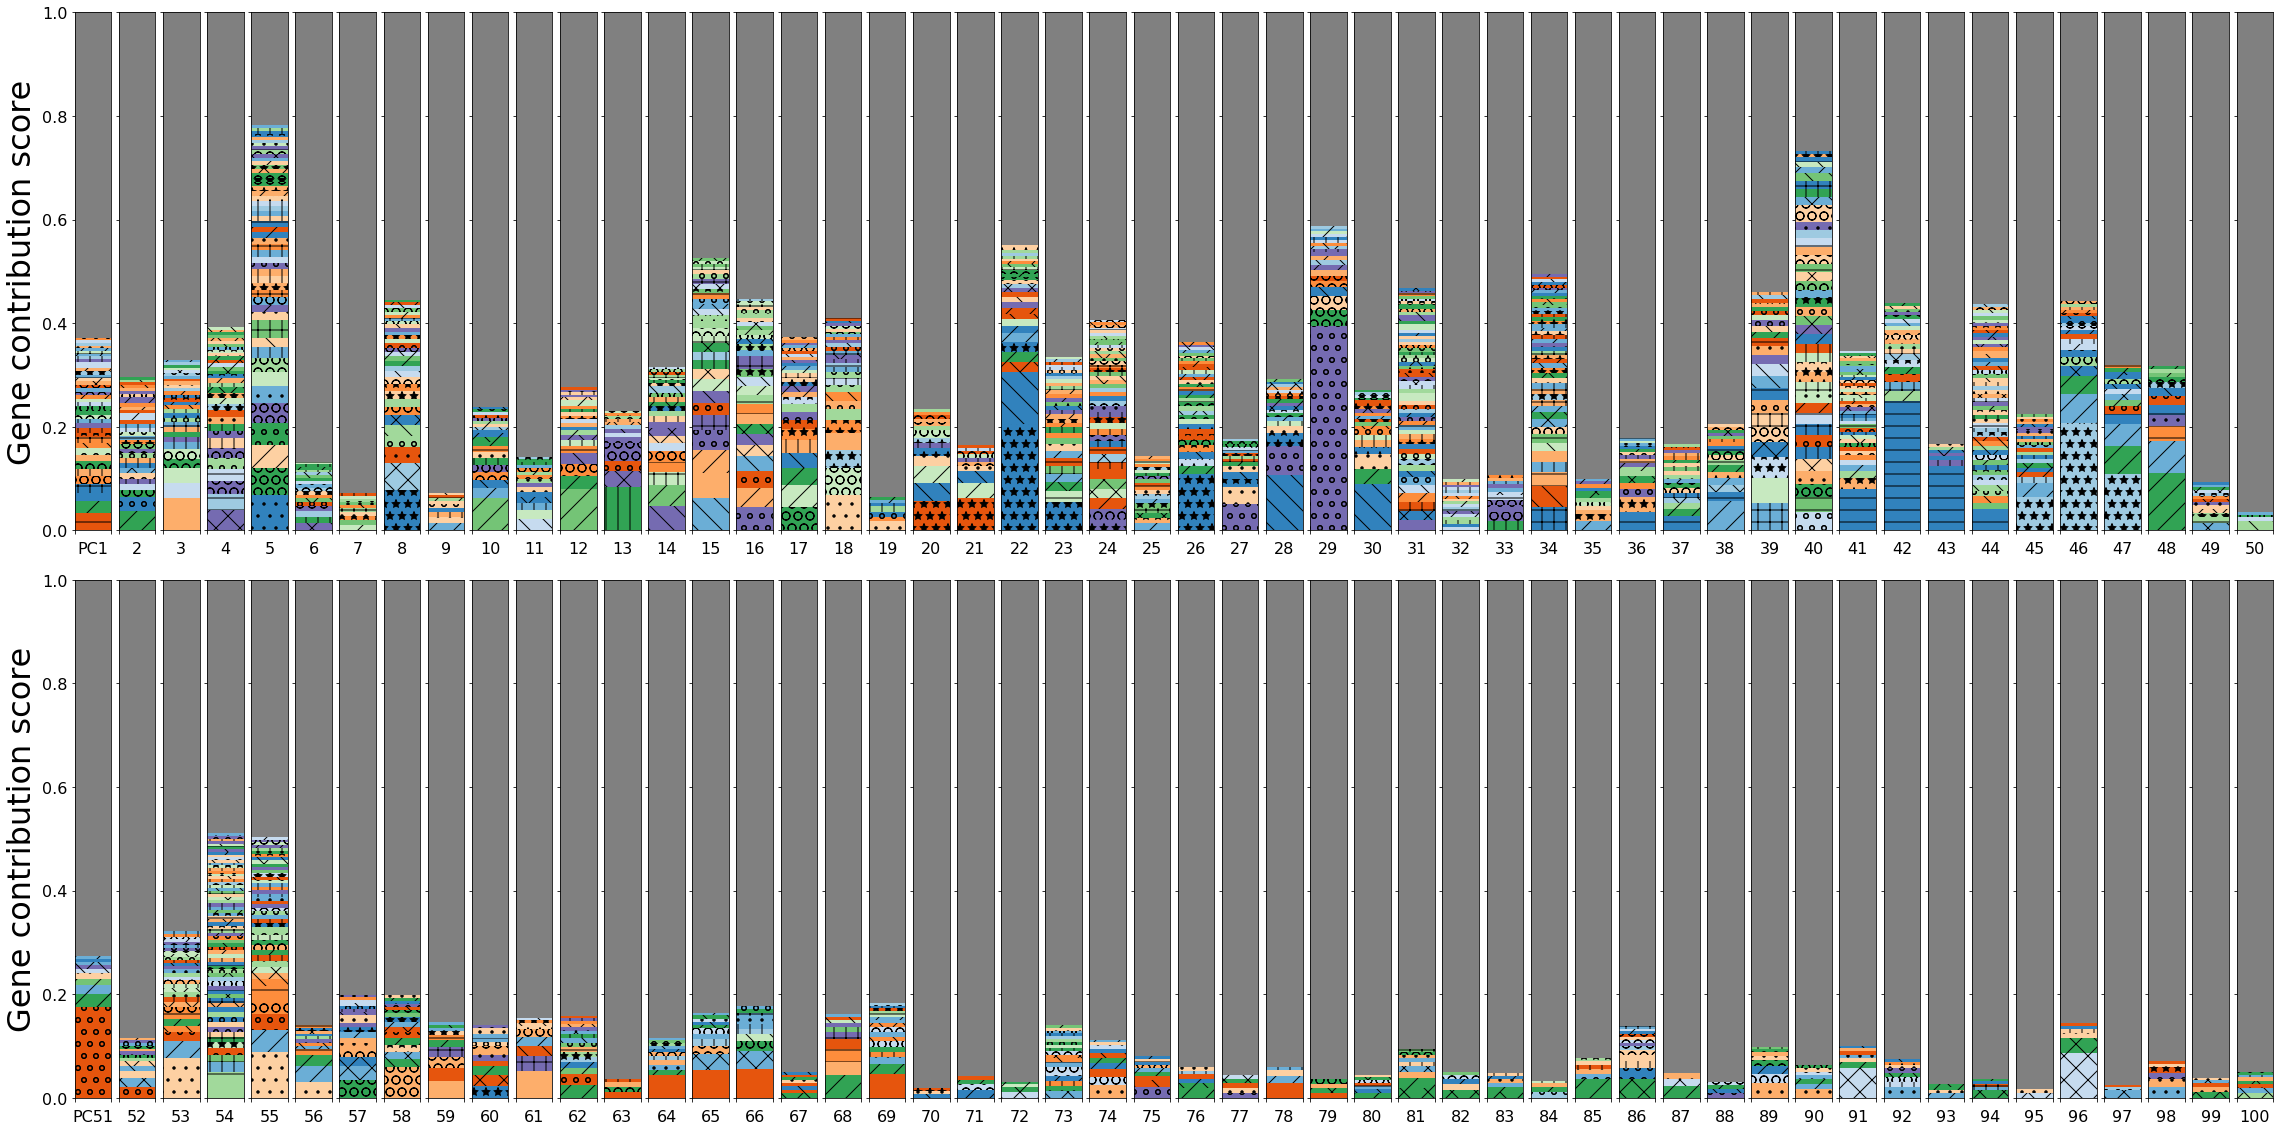

In [7]:
contribution_score_plot(
    d_coding, 'gene',
    contribution_thr=0.005,
    yaxis_label_size = 32,
    save=os.path.join(out_dir, 'fig-codingNonMHC-gene-global.pdf')
)

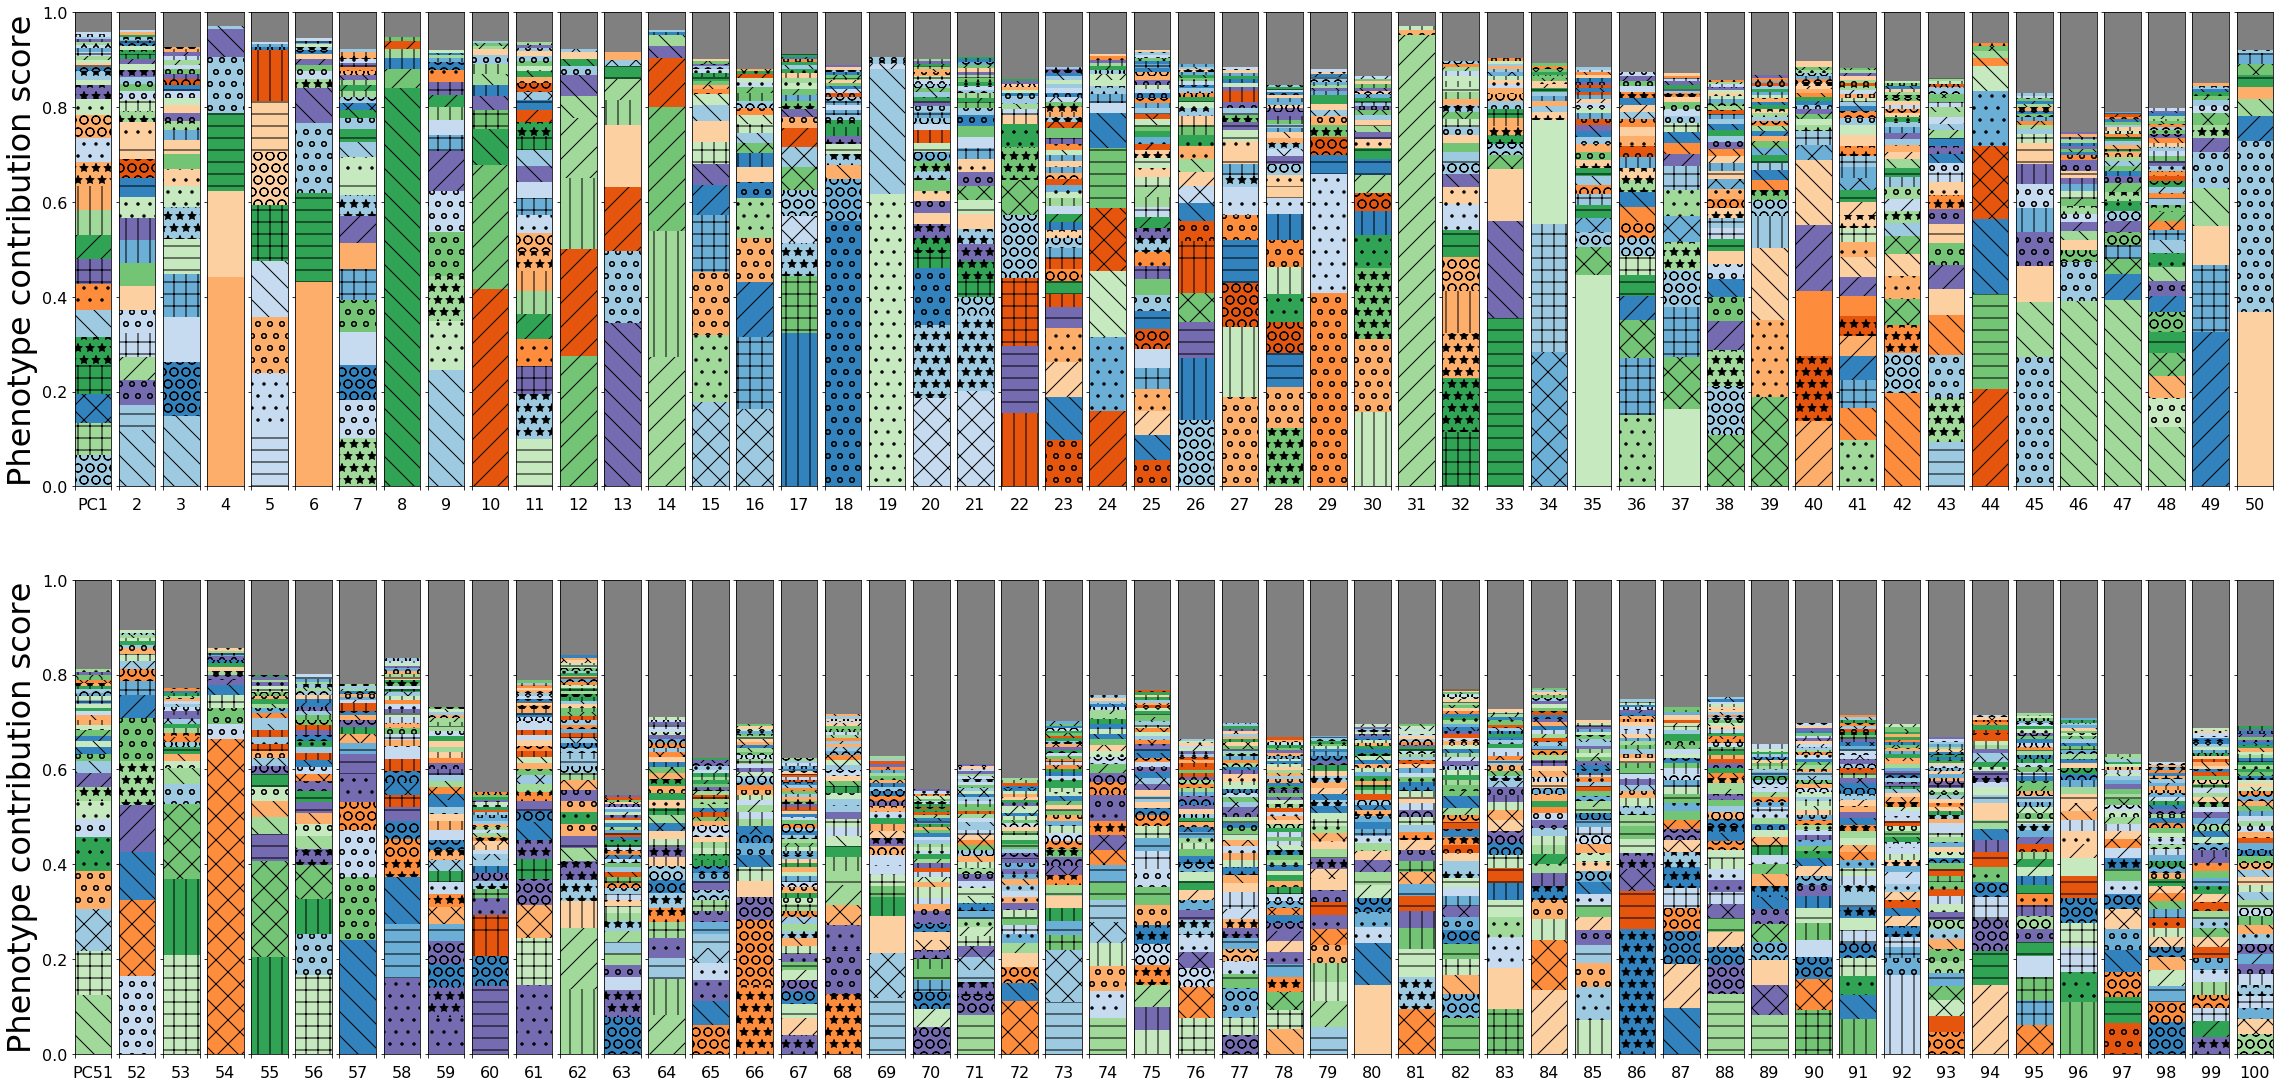

In [8]:
contribution_score_plot(
    d_coding, 'phe',
    contribution_thr=0.005,
    yaxis_label_size = 32,
    save=os.path.join(out_dir, 'fig-codingNonMHC-phe-global.pdf')
)